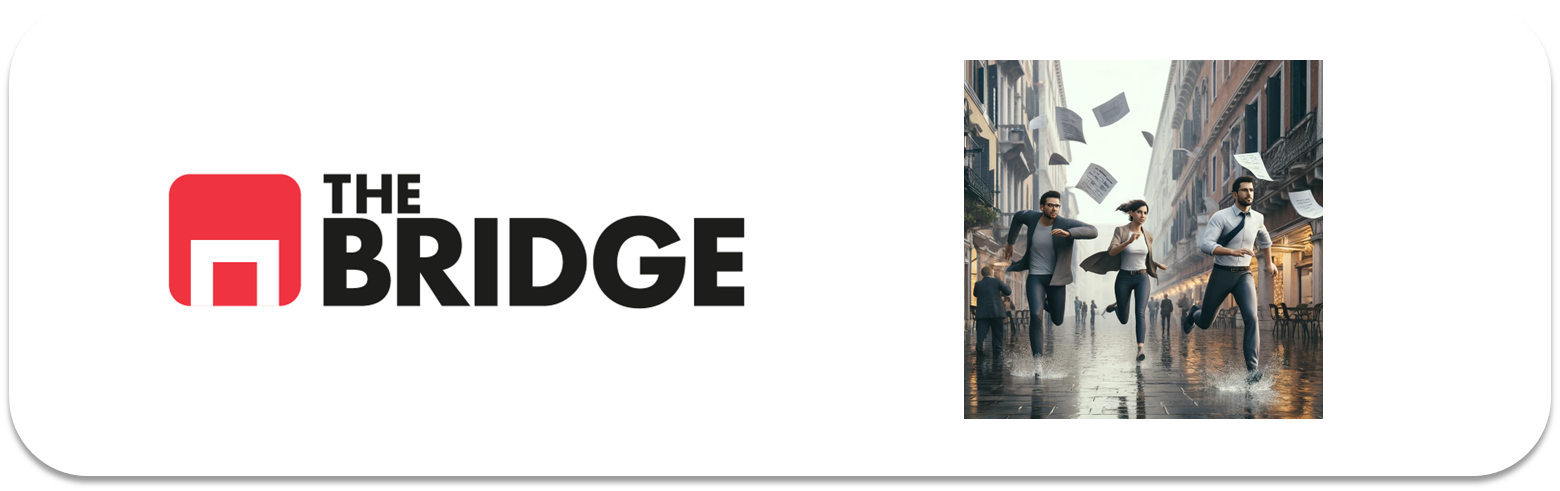

## Repaso/Feedback General Proyecto ML

### Puntos Fuertes

* (muy) buenos MiniEDAs -> Buenos trabajos de limpieza y preparación tendiendo a muy buenos; Creación de variables
* Proceso Interiorizado (con matices :-))
* Utilización de varios modelos, uso de redes y proyectos de imágenes
* Optimización de hiperparámetros (dado el nivel al que lo hemos trabajado)
* "Frustracion" (me explico)
* Variedad y atrevimiento 



### Puntos de mejora (por parte de todos, LI y curso incluido)

* A pesar del musicajo y del bailoteo... :-( :-(  -> Train y Test
* Implicación: Evaluación con Test y Evaluación con Train? -> **Evaluación de modelos: Baseline models**
* Las **métricas y (derivados)**: 
    - Problemas con métricas de correlación cuando el target tiene outliers o una distribución de larga cola. Soluciones:
    - Escoger la métrica de clasificación que mejor refleje nuestra necesidad de negocio. No ha quedado claro 100%. Complemento: Otras métricas de clasificación (lift). 
    - Datasets desbalanceados, ¿qué hago? -> La importancia del class_weight, y si uso SMOTE cualquier técnica de Oversampling -> Necesito un set de validación
    - BONUS: El impacto enconómico

### Train y test  

En supervisados separamos train y test, para tener un dataset aleatorio que simulan los datos que nos llegaran en el futuro. ¿Por qué? ¿Para qué? 

- Nuestro modelo, si merece la pena, se ejecutarás muchas veces para "etiquetar" instancias nuevas (¿qué es una instancia?) (que además no necesariamente llegarán en "grupo")
- Con el tiempo estas instancias nuevas se convertirán en posibles elementos de train (porque la "etiqueta" real se habrá medido)
- Para simular esta posible situación: datos nuevos no vistos antes, es por lo que separamos el test y así poder al evaluar nuestro modelo contra él tener una expectativa
- El test se reserva para el final, para el modelo elegido no para comparar entre modelos.
- Como son datos que no podemos ver, que simulan el "futuro", formalmente no podemos utilizarlos en ninguno de los pasos de limpieza, análisis, modelado. Es cierto que hay excepciones (convertir categóricas, valores que son siempre igual para todos, etc), pero es importante separar después del vistazo y "olvidarnos" del test. 
- Por eso antes de los MiniEda, selección de features, preparado de estas, generación de nuevas -> TRAIN/TEST SPLIT y guardo el test.
- Tenéis que pensar que el dataset de test es como la parte oculta que tiene Kaggle en las competiciones que no sabes que va a pasar hasta el final... 
- ¿Dudas?


### Comparación y evaluación de Modelos

- Como se supone que no tengo el dataset de Test, no debería comparar usando el Test si luego voy a optimizar los hiperparámetros usando cross_validation. Por cierto la semilla NO es un hiperparámetro.
- Muchos (lamentos) "es que me sale peor con la optimzación de hiperparámetros" tienen su origen en que comparamos el valor del modelo por defecto contra test, con lo que nos da el best_score_ sacado con cross_validation. Estas comparando con datasets diferentes con medidas distintas....
- Por ESO GRABAOSLO A FUEGO:
    - Comparo usando: La media del cross_val_score o generando un dataset de validación y usando ese con todos o tunenando los hiperparámetros y comparando el best_score_ del GridSearch del tuneado. 
    - PASOS
    - Me quedo con el que dé mejor métrica o en caso de ser muy similares me quedo con el más sencillo. [ESTO ES LA COMPARACION]
    - Si no he optimizado ya los hiperparámetros: Los optimizo ahora.
    - Evaluó el modelo contra el TEST (primero lo entreno con todo el train, si he hecho GridSearch ya tendré en best_estimator_ el modelo entrenado con todo Train y con los hiperparámetros correctos), ahora sí, y sólo el modelo elegido y tuneado.  [ESTO ES LA EVALUCION]
    - Analizo las diferencias del bests_score de tunear los hiperparámetros con el resultado contra test. Analizo los errores y eso me lleva a ... LAS METRICAS

Inciso, antes: Siempre que podáis, incluid un modelo baseline (porque nos permite tener un assesment básico):
- Sin tunear, medido con cross_val_score o contra un dataset de validación (Mismas condiciones que vayas a aplicar con el resto de modelos) -> Compáralo con el resto de modelos.
- Si quieres al final del todo (fase de evaluación) puedes entrenarlo con todo train y probarlo contra test y contra lo que te dé tu modelo "ganador"

### **Métricas**

**Las métricas no se escogen por qué sí. Tienen que ser las que mejor reflejen que el modelo puede ayudar a resolver el problema de Negocio.**

O sea: tengo que entender las métricas, tengo que entender a negocio (ninguna de las dos cosas es sencilla y es difícil transmitirlas en un bootcamp, I am aware)

#### **Métricas de Correlación**

Las métricas de correlación son casi todas medidas de errores que se comenten entre lo que realmente es (la realidad) y el valor predicho. En general son variantes de hacer la diferencia entre el valor real y el "predicho". 

Entonces.... ¿Esta métrica es buena cuando es alta o baja?¿Y QUE ES ALTO Y BAJO? Por eso es bueno el MAPE.

Es fundamental pintarse un scatter y_test vs y_pred al final:

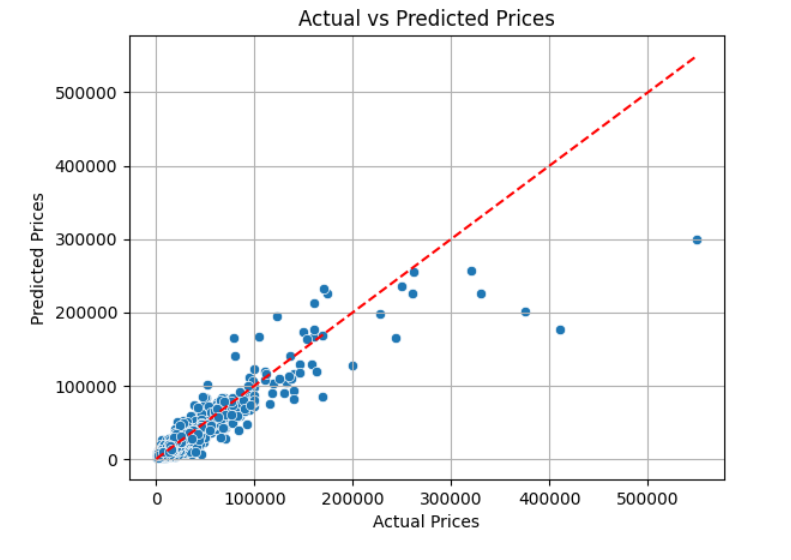

MAE: 3023.838878129512  
MSE: 6510.268676811168  
MAPE: 35.176049396701394  

Distribución y_real:


count      9842.000000  
mean      15575.774131  
std       18090.077814  
min         300.000000  
25%        5500.000000  
50%       11950.000000  
75%       19900.000000  
max      549900.000000  

#### Outliers

*Cuando los outliers están en el target*:
- Caparlo (convertir los > MAXIMO  en MAXIMO)
- Hacer dos modelos (uno para valores inferiores a un umbral, otro para mayores) -> Problema como saber que modelo aplicar a cada nueva "instancia", Solución: Ambos
- Convertirlo en un problema de clasificación
- Usar métricas logarítmicas (vale en la comparación de modelos pero luego....)


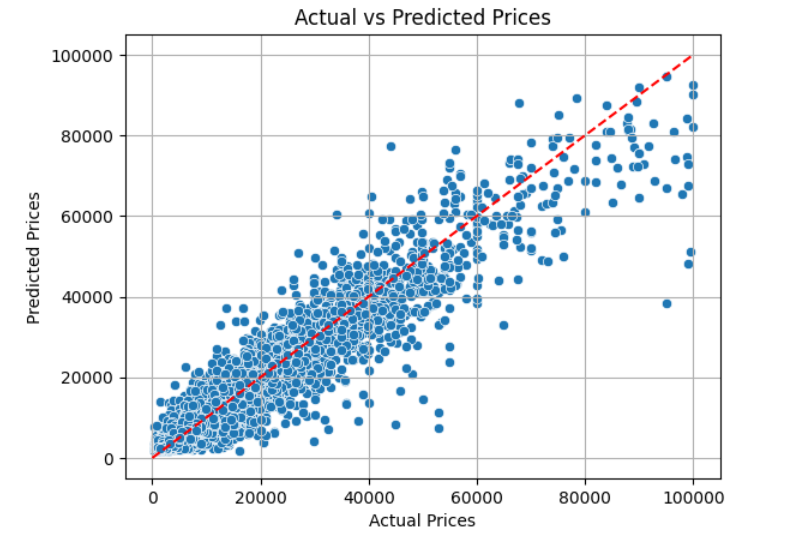

MAE: 2733.71  
MSE: 4247.96  
MAPE: 33.96  


*Cuando los outliers están las features*:
- Escalamos y esperamos que eso lo suavice
- Si el modelo "no va" y tenemos outliers podemos probar:  
    - Hacer dos modelos: Sin outliers, solo outliers  
    - Categorizar la feature con outliers  
    - Capar la variable:   
        1. Poniendo un tope de valor máximo (o cap, por eso se llama malamente "cappar")   
        2. Eliminar valores superiores a un percentil determinado (90-95%)  

#### **Métricas de Clasificación**

Repasemos conceptos a partir de una matriz de confusión:

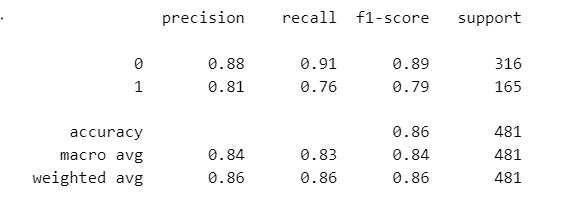


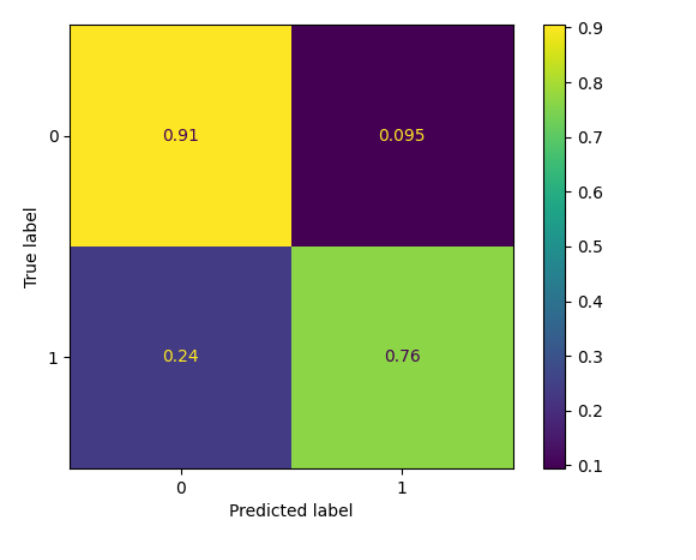

CURVA ROCO Y AUROC

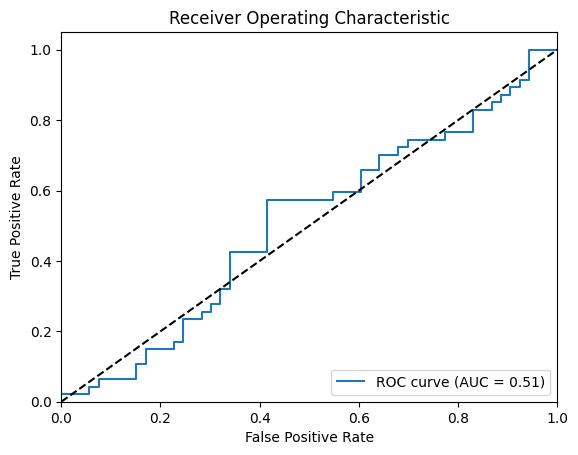

In [1]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Generar datos aleatorios
y_true = np.random.randint(0, 2, size=100)  # Etiquetas verdaderas (0 o 1)
y_scores = np.random.rand(100)  # Puntuaciones predichas (entre 0 y 1)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Calcular el AUC
auc = roc_auc_score(y_true, y_scores)

# Crear la gráfica
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Una métrica nueva: Lift

Muchas veces vamos a emplear el modelo para seleccionar "instancias" (pacientes, clientes, etc) sobre los que aplicar una acción (una llamada para que se hagan un chequeo, una campaña comercial, una campaña de "pague" que le conviene, etc). La idea entonces es no tanto cuanto de bien clasifica el modelo sino cuanto de bien "ordena".   

Es decir, que si empleásemos las probabilidades de pertenecer a una clase como una métrica para ordenar clientes (los que tengan la probabilidad más alta de ser un 1, por ejemplo), concentraríamos los casos de la case 1 en las probabilidades altas.  

Eso nos permitiría escoger a los clientes/usuarios/pacientes a los que hacer una "acción" en función de la probabilidad dada por el modelo.

Lo que se suele medir es el **lift** de un modelo. 

**LIFT**: (segun chatgpt, que no está mal)

El "lift" es una medida de la efectividad de un modelo predictivo calculada como la proporción entre los resultados obtenidos con y sin el modelo. En el contexto de una clasificación binaria, el lift puede ser entendido como cuánto mejor es el modelo para predecir la clase positiva comparado con una selección aleatoria.

Para calcular el lift en el contexto de las puntuaciones de clasificación, generalmente se compara la tasa de acierto en los k casos mejor puntuados contra la tasa de acierto general en toda la muestra. Este cálculo requiere definir un punto de corte, que es una fracción de la población total (por ejemplo, el top 10% de las puntuaciones).

Cómo se calcula:

1. Se obtienen para X_test las probabilidades (para la clase que nos interese)-> predict_proba (en general en sklearn, predict en el caso de keras), y la predicción
2. Se asocia a cada predicción su probabilidad y el valor real.
3. Se ordenan los resultados por probabilidad descendente 
4. Se escoge un punto de corte (por ejemplo los n-mil primeros valores que serán el x% del total, supongamos un dataset de test de 10000 personas y queremos ver el lift del modelo al 20%, entonces nos quedaremos con los 2000 elementos con mayor probabilidad)
5. Se calcula el porcentaje de acierto (elementos de clase escogida realmente bien clasificados)
6. Se divide por el porcentaje real de la clase esocogida presente en el test

Imagina que de los 2000 de probabilidad más alta, el 80% es de la clase estudiada y que en el dataset de test hay un 40% de sujetos de esa clase. El lift será = 80/40 = 2, un lift de 2. 



Lo normal es obtener una curva de lift moviendo el punto de corte y con eso sacar una gráfica de la que escoger el punto más interesante. Un ejemplo (al final un par de funciones para obtenerlo)

In [ ]:
def calculate_lift(true_values, scores, percentile=0.1): # Funciona para la clase 1
    df = pd.DataFrame({"labels": list(true_values), "score": list(scores)})
    df.sort_values("score", ascending = False, inplace = True)
    # Ordena las muestras por las puntuaciones decrecientes
    top_k = int(len(scores) * percentile)
    
    # Calcula las tasas de aciertos
    hit_rate_top = df.iloc[:top_k].mean()
    hit_rate_overall = df["labels"].mean()
    
    # Calcula el lift
    return hit_rate_top / hit_rate_overall

In [ ]:
def plot_lift(true_values, scores):
    
    # Calculamos lift en diferentes top_k
    top_ks = np.linspace(0.05, 1, 20)  # Del 5% al 100% en 20 pasos
    lifts = [calculate_lift(true_values, scores, k) for k in top_ks]

    # Graficar lift
    plt.figure(figsize=(10, 5))
    plt.plot(top_ks * 100, lifts, marker='o', linestyle='-', color='b')
    plt.title('Lift across different top k%')
    plt.xlabel('Top k%')
    plt.ylabel('Lift')
    plt.grid(True)

    # Mostrar gráfico
    plt.show()

In [ ]:
# Obtenemos las probabilidades o scores
scores = rf_clf.predict_proba(X_test_pt)[:,1]
plot_lift(y_test_pt,scores)

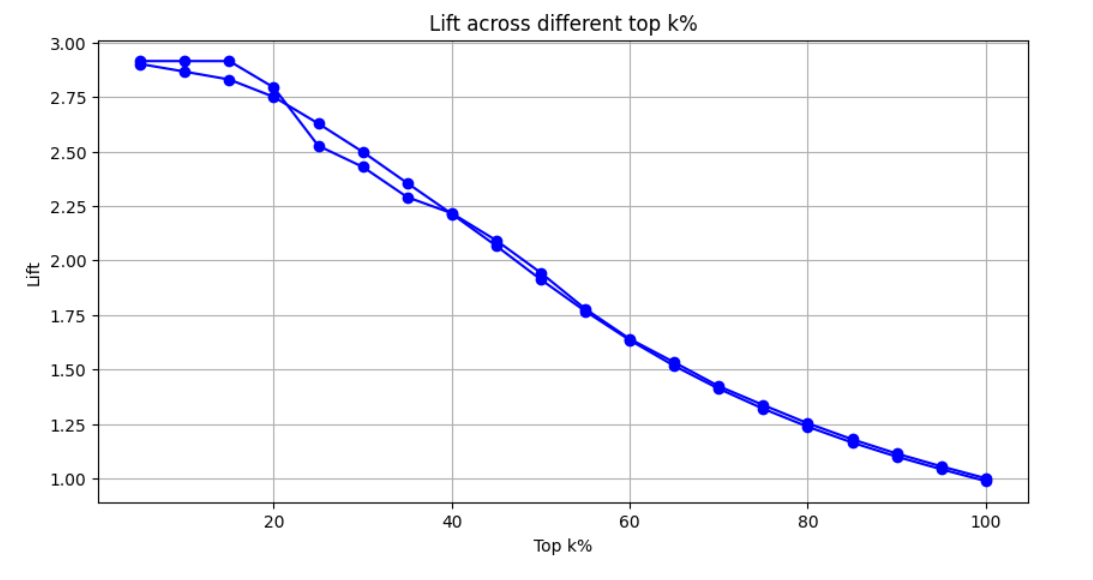

#### **"Métricas" de Clustering (o agrupamiento)**

Lo primero NO HAY METRICAS DE EVALUACION DE CLUSTERING con el mismo sentido que las de supervisados.

La forma de evaluar una agrupación es con conocimiento de dominio y hablando con Negocio.

Como alivio, empleamos medidas que nos dicen cuanto de "COMPACTOS" son nuestros grupos o clusters o bien gráficamente vemos que tiene "sentido":
Medidas Intra-Inter cluster:
    - Shiloutte Score
    - Inercia
Medidas Inter cluster:
    - Todas las medidas de linkage de los métodos jerárquicos (son medidas de distnacia entre clústers que se pueden comparar con las intra-cluster)

Aunque salgan "buenas" (en general bajas) no quiere decir que tengamos una agrupación con sentido, pero menos es ná...

### **Análisis de Errores**

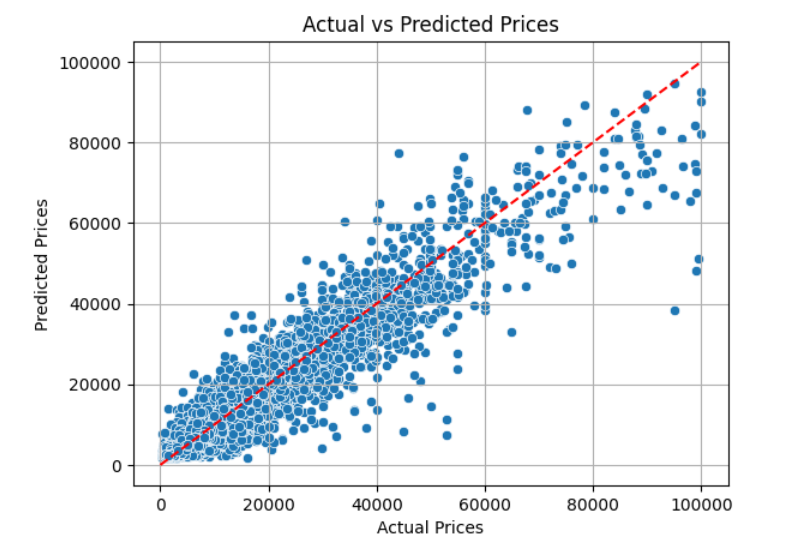

- Por ejemplo: ¿Tendencia a bajopreciar? Sobre todo en coches "caros" -> Estudiar por modelo, marca los errores

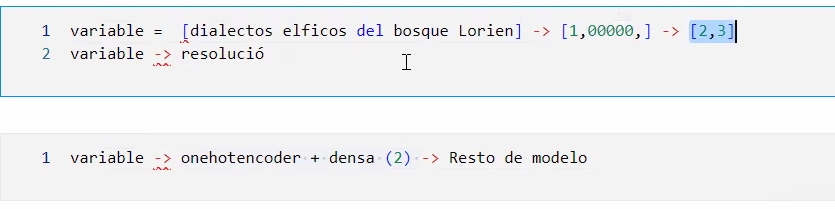